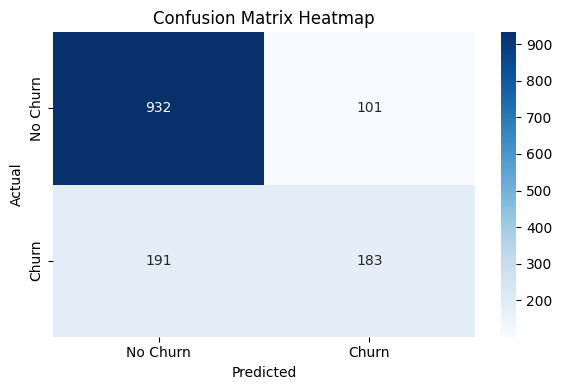

Classification Results:
Accuracy:  0.7925
Precision: 0.6444
Recall:    0.4893


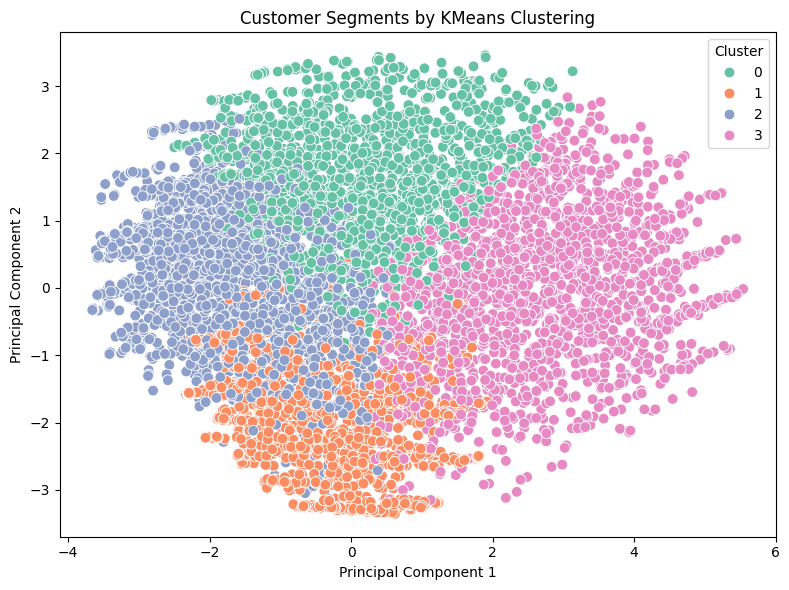

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("/content/5. Classify Customer Churn.csv")

### ----------------------------
### PART 1: CLASSIFICATION
### ----------------------------

# Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop customerID
df.drop(columns=['customerID'], inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical features
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Classification Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

### ----------------------------
### PART 2: CLUSTERING
### ----------------------------

# For clustering, remove target column
features = df.drop(columns=['Churn'])

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster and PCA info to dataframe
df['Cluster'] = clusters
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title("Customer Segments by KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
